# Sara Ferrari, Michael Vizelman, Rachel Ward - DAV 6150 - M4 Assignment
## Introduction

In this assignment, we will be applying feature selection and/or dimensionality reduction techniques on a dataset of 205 automobile gas mileage observations. The original dataset comes from [UC Irvine](https://archive.ics.uci.edu/ml/datasets/Automobile).  

Our data set has 26 attributes. One is the city miles per gallon (city-mpg), which is our response variable. We will apply feature selection and dimensionality reduction to the other 25 attributes to identify the explanatory variables that will be most useful in a linear regression model that estimates city-mpg.

To accomplish this, we will first perform an exploratory data analysis (EDA) on the dataset, to identify any attributes that may be good predictors for city-mpg. Then we will perform feature selection and dimensionality reduction to identify the features that will be most useful in our linear regression model. Lastly, we will evaluate our regression model, including training the model, cross validating, and noting its accuracy. 

## Data Profiling

We start by profiling our data based on the UCI's website and dataset description. This will help us determine how to treat any missing and/or invalid data, as well as help as to give our columns header names that make sense.

These are the attributes in order of appearance in the dataset, and as stated on the UCI website.

1. symboling: -3, -2, -1, 0, 1, 2, 3. (Assigned insurance risk rating, +3 indicates auto is risky, -3 indicates pretty safe. Corresponds to whether the car has a higher risk level than its price indicates.)
2. normalized-losses: continuous from 65 to 256. (Relative average loss payment per insured vehicle year. Normalized for autos within a particular size classification, represents average loss per car per year.)
3. make:alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

## Data Preparation

For our first step, we will read the data into a pandas dataframe using pandas read csv function. We will then rename the columns to make the data easier to understand. Then we will check for missing values.

In [1]:
#first import the necessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#next read in the file
filename = 'https://raw.githubusercontent.com/rachelward617/DAV-6150/master/M4_Data.csv'
autos = pd.read_csv(filename, header = None)

#check results
autos.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


We see that our columns do not have appropriate headers so we will first rename our columns.

In [2]:
#rename columns to aid our analysis
autos.columns = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 
                 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
                'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
                'highway_mpg', 'price']
#check results
pd.set_option('display.max_columns', None) #display all columns
autos.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


From our domain knowledge, we see a typo in the make column, alfa-romero should be alfa romeo, so here we make that change.

In [3]:
#change all 'alfa-romero' values in the 'make' column to 'alfa-romeo'
autos.make = autos.make.replace(to_replace = 'alfa-romero', value = 'alfa-romeo')
#check if there are any old 'alfa-romero' values left
(autos.make == 'alfa-romero').sum()

0

Now that we have renamed our column headers, we will check for null values. We also note that there are values of "?" in the normalized_losses column which are not valid values as described in our data profiling. First we will check the data type for each of our attributes, and make any changes necessary based on our data profiling. Doing this should enable us to find any missing values.

In [4]:
#check data types
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_of_doors         205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_of_cylinders     205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

In [5]:
#replace ? values with numpy's NaN so that columns can be transformed to the appropriate data type
autos = autos.replace(to_replace = '?', value = np.nan) 

#check results
autos.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [6]:
#transform normalized_losses, bore, stroke, horsepower, peak_rpm, and price to numeric based on data profile
autos[["normalized_losses", "bore", "stroke", "horsepower", "peak_rpm", "price"]] = autos[["normalized_losses", "bore", "stroke", "horsepower", "peak_rpm", "price"]].apply(pd.to_numeric)

#check results
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_of_doors         203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_of_cylinders     205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-

Now that we have the data transformed to appropriate types, we will begin our EDA.

## Exploratory Data Analysis (EDA)

We will begin our EDA by checking for missing values. 

In [7]:
# check the dataset for null values
autos.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

Since there is missing data, we will next import the missingno library and see if there is a pattern to the missing data. 

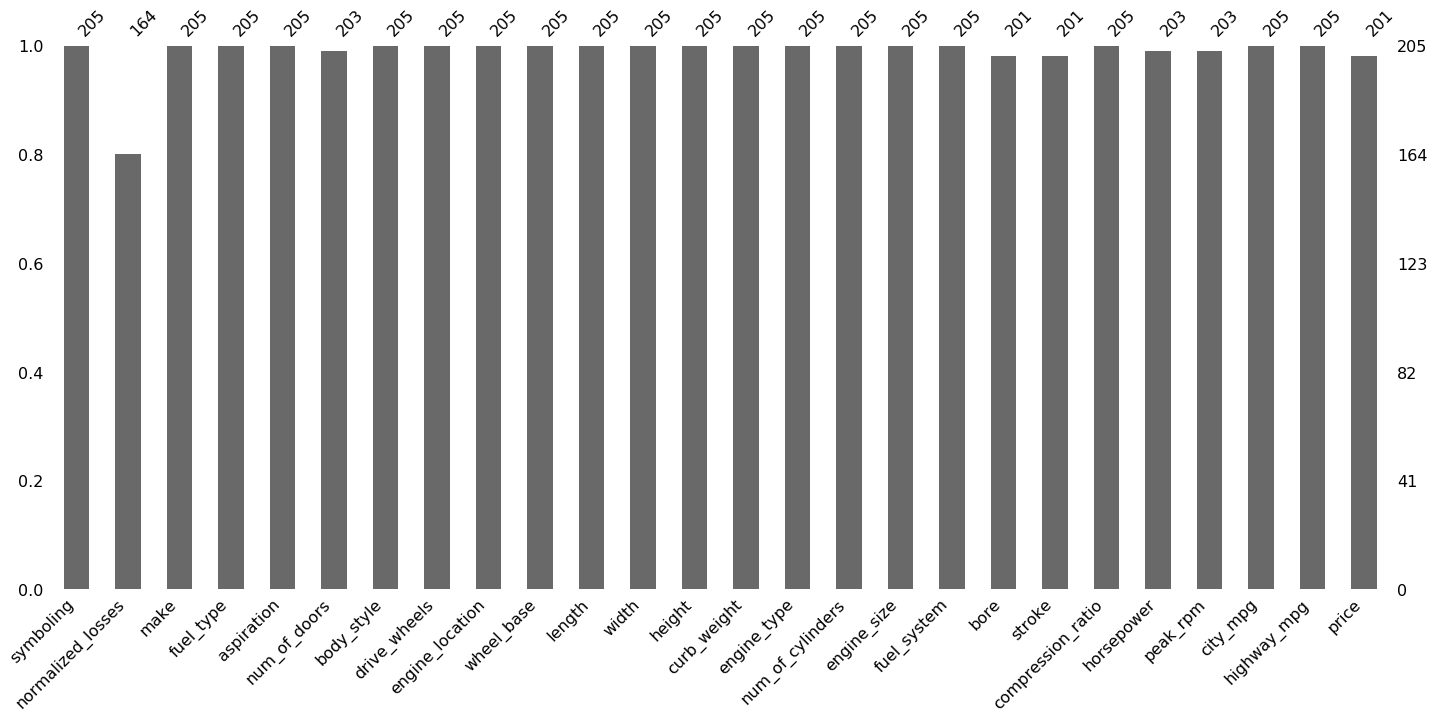

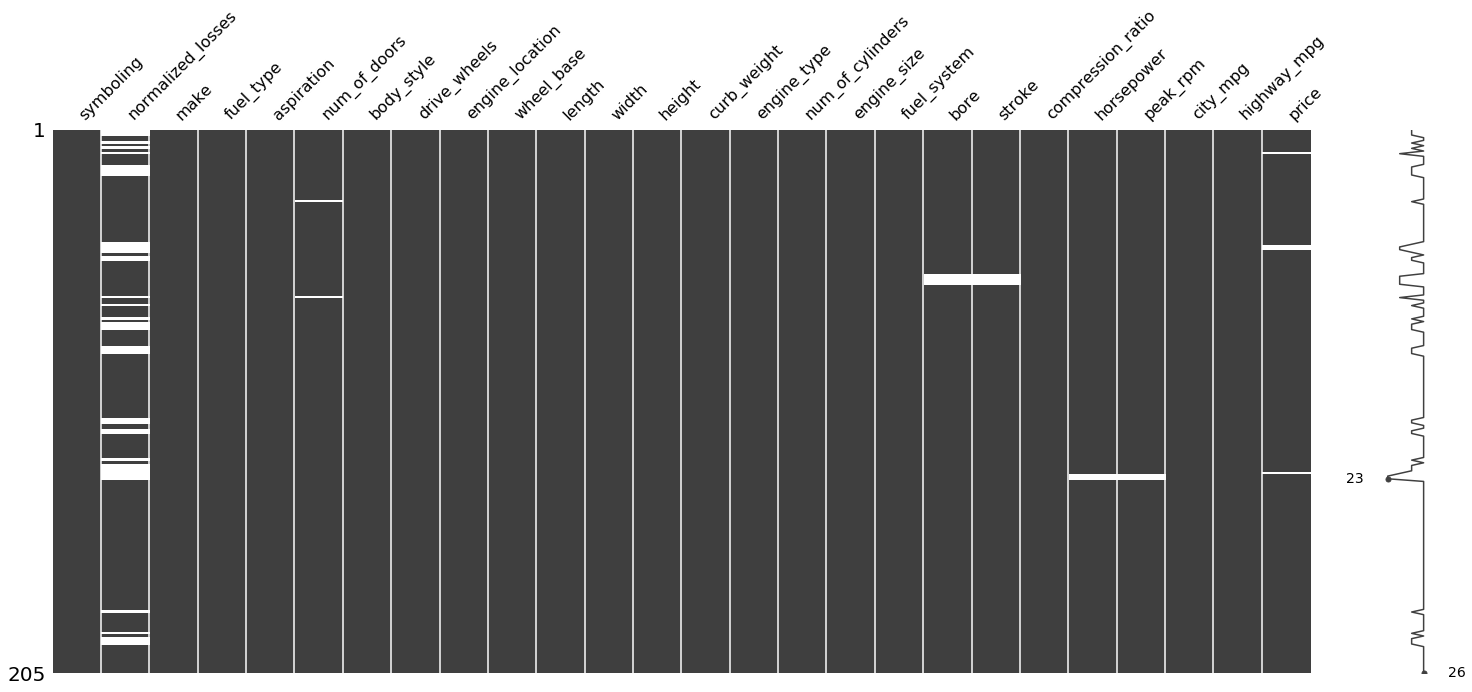

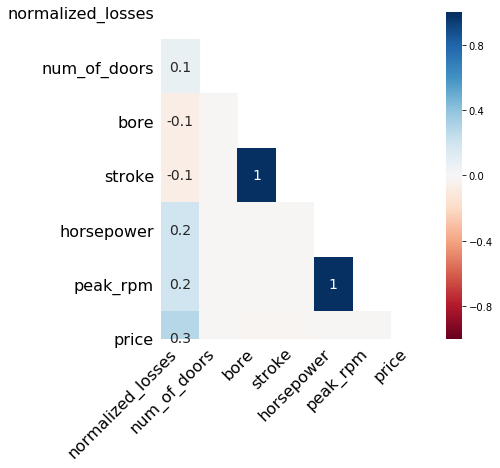

In [8]:
#import missingno library
import missingno as msno

#visualize the amount of missing data using missingno's bar chart
msno.bar(autos);

#use missingnos matrix to see if there is a pattern to the missing data
ax = msno.matrix(autos)
ax.get_figure();

#graph a heat map of the missing data to see if the locations where the data are missing are correlated.
#code as referenced in O'Reilley's Machine Learning Pocket Reference
ax = msno.heatmap(autos, figsize = (6,6))
ax.get_figure(); #add a ; at the end to prevent it from displaying twice

There do appear to be a few rows where there are multiple attributes missing data.  There are a few attributes that have missing data that is correlated, such as horsepower and peak rpm and stroke and bore.

However, since our sample size of 205 is so small, it will be more beneficial to try and fill those missing values with appropriate data points rather than discard those rows. 

Next, we will check for duplicate observations. 

In [9]:
#check for duplicates
autos[autos.duplicated()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


No duplicates were found. 

Now we will look at the summary statistics for each variable.

In [10]:
#get summary statistics for each numeric variable, including mean, standard deviation, median, quartiles, and range
autos.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


We note that symboling is a categorical variable. We see from above that there are no invalid values for the normalized losses, wheel-base, length, width, height, curb_weight, engine dize, bore, stroke, compression-ratio, horsepower, peak_rpm, city_mpg, highway_mpg, and price, since all values fall within the ranges specified in the data profile.

Now we will look at the distributions of each of our attributes. We first create two lists, one for the categorical variables, and another for numeric so that we may use the appropriate visualizations.

In [11]:
#create lists of numerical and categorical attributes

col_cat=['symboling', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 
         'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system']

col_num=['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 
         'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
         'highway_mpg', 'price']

print("# of Numerical attributes:%s" %len(col_num))

print("# of Categorical attributes:%s" %len(col_cat))

# of Numerical attributes:15
# of Categorical attributes:11


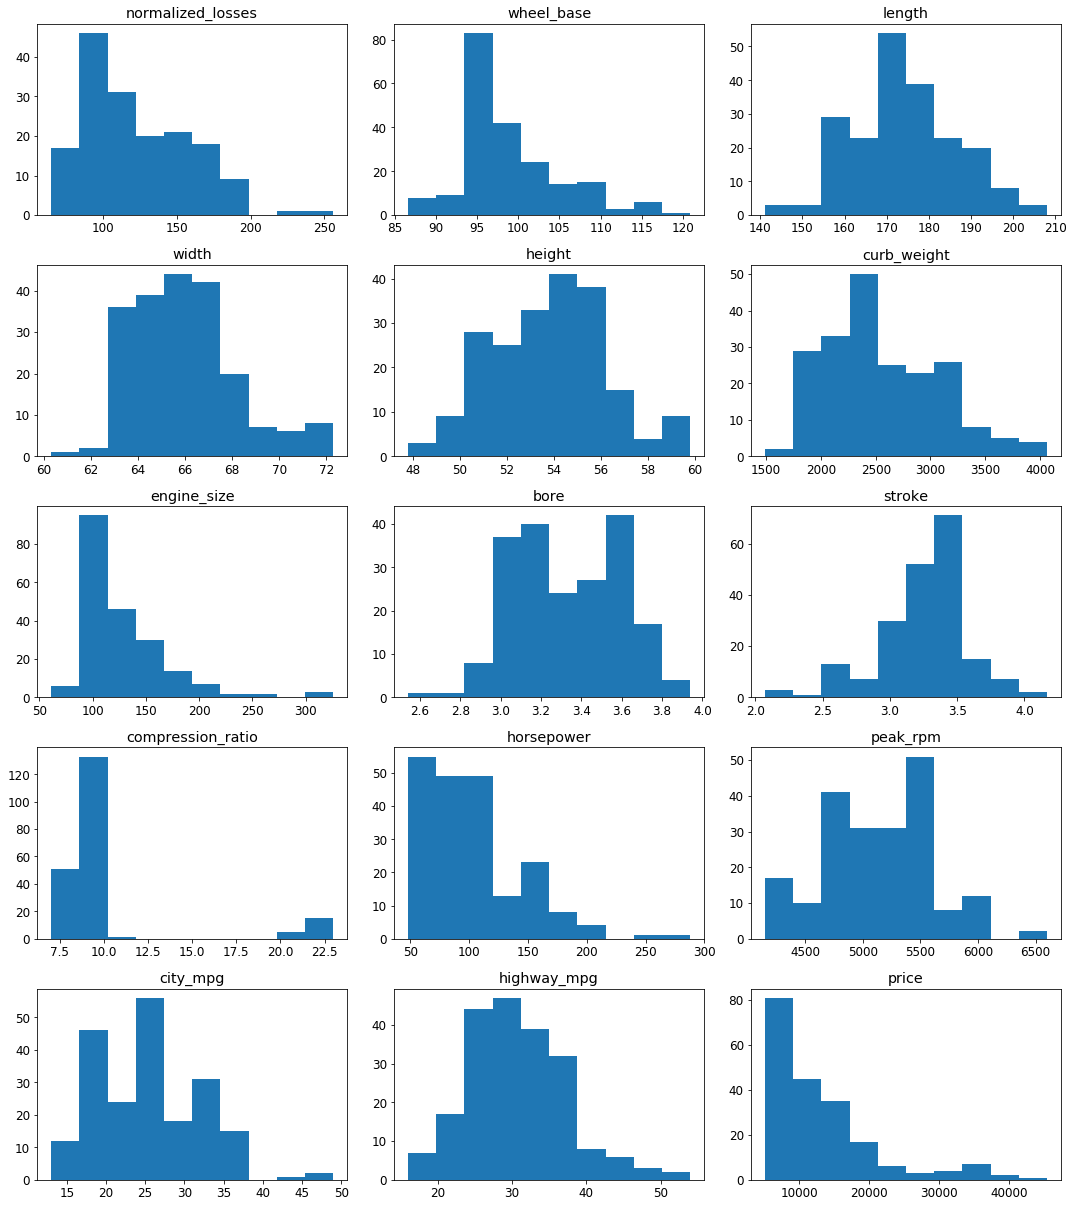

In [12]:
#plot a histogram for each of our numerical attributes

plt.rcParams.update({'font.size': 12,'figure.figsize':(15,20)}) # set plot parameters

#ignore warnings
np.warnings.filterwarnings('ignore')

#use an index to identify the spot of the subplot
j=1
for k in col_num :   #for each numerical column 
    plt.subplot(6,3,j) 
    plt.hist(autos[k])
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space

plt.tight_layout()
#show results    
plt.show()

Wheel base, horsepower, price, highway mpg, curb weight, engine size, and normalized losses appear to be slightly right skewed, while length, bore, stroke, width, and height are approximately normally distributed. Peak rpm and city mpg appear to be approximately normally distributed with a few higher outliers. 

Compression ratio appears to be clustered, with most of the observations around 7.5 - 10, with another, smaller, cluster around 20 - 22.5.

Next we will look at the distributions for our categorical variables. 

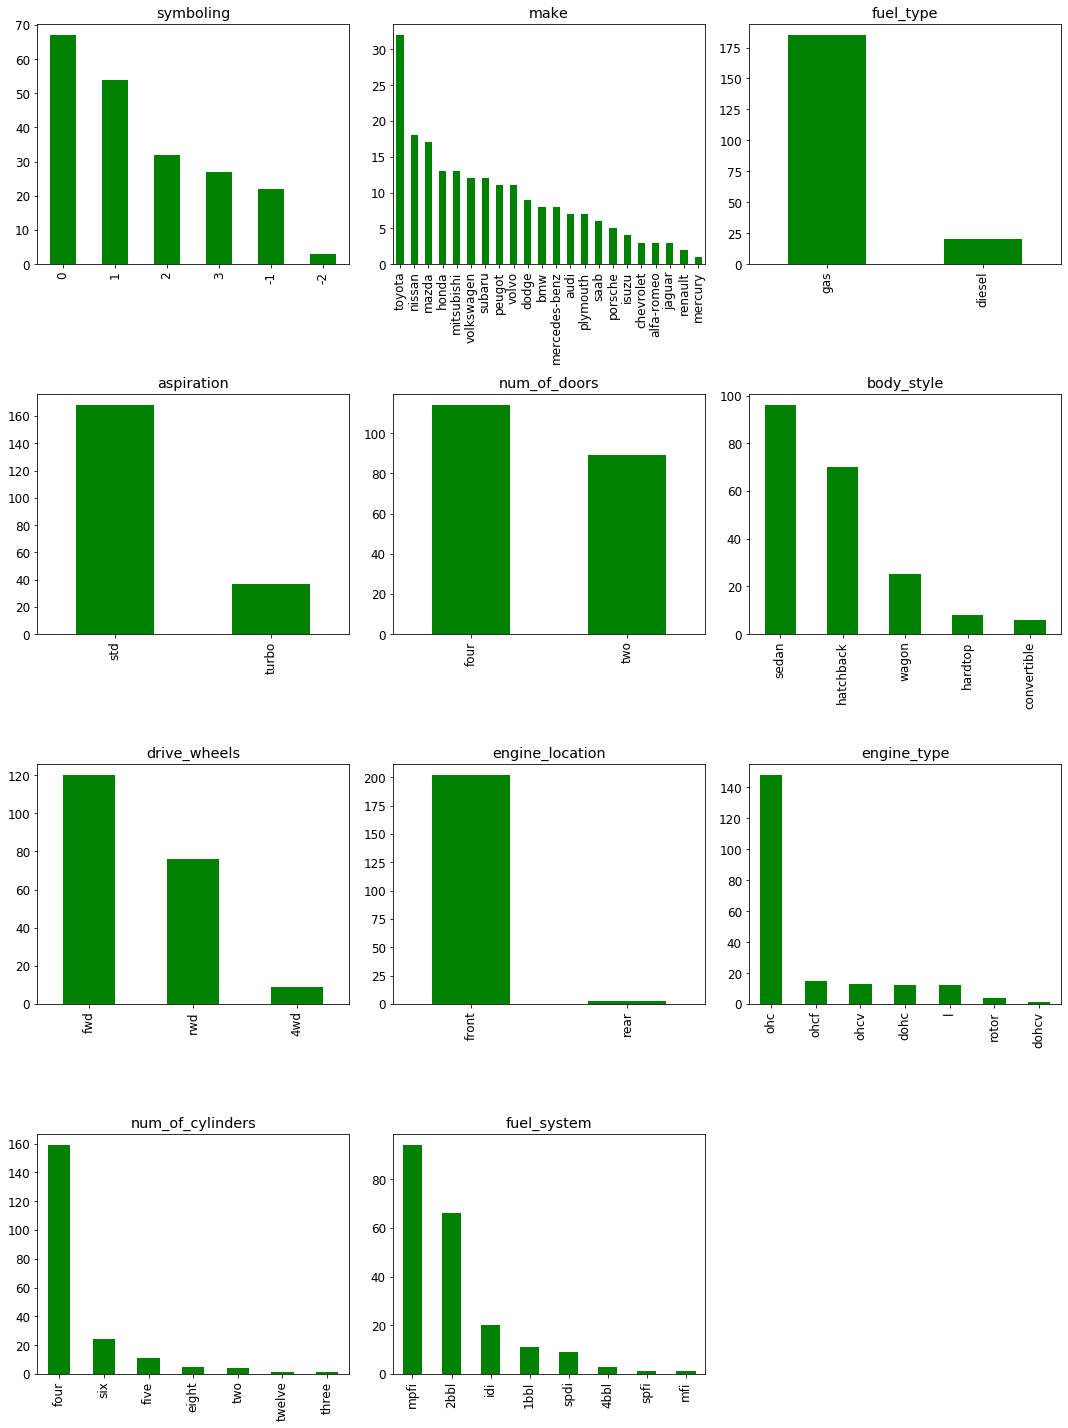

In [13]:
#plot a bar chart for each of our categorical attributes

#use an index to identify the spot of the subplot
j=1

for k in col_cat :   #for each categorical column 
    plt.subplot(4,3,j) 
    autos[k].value_counts().plot(kind='bar', color='green');
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space

plt.tight_layout()
#show results    
plt.show()

The most prevalent observation for symboling was 0 which means moderately safe. The most prevalent make of car is Toyota. There are far more observations of vehicles with gas as a fuel type than diesel, which again makes sense as most cars in the United States run on gas. Similarly, the majority of observations are for standard vehicles rather than turbo, which again makes sense based on our domain knowledge. There are only two possible options for number of doors, which have almost an even number of observations each. 

The most prevalent body style is sedan. Front wheel drive (fwd) is the most prevalent observation in the drive_wheels attribute. The most common number of cylinders is four. The most common type of fuel system is mpfi.

There appear to be very few observations with engines located in the rear of the vehicle which makes sense based on our domain knowledge.  Similarly, over 140 of the 205 observations have an engine type of ohc.

Next we will check the boxplots for outliers.

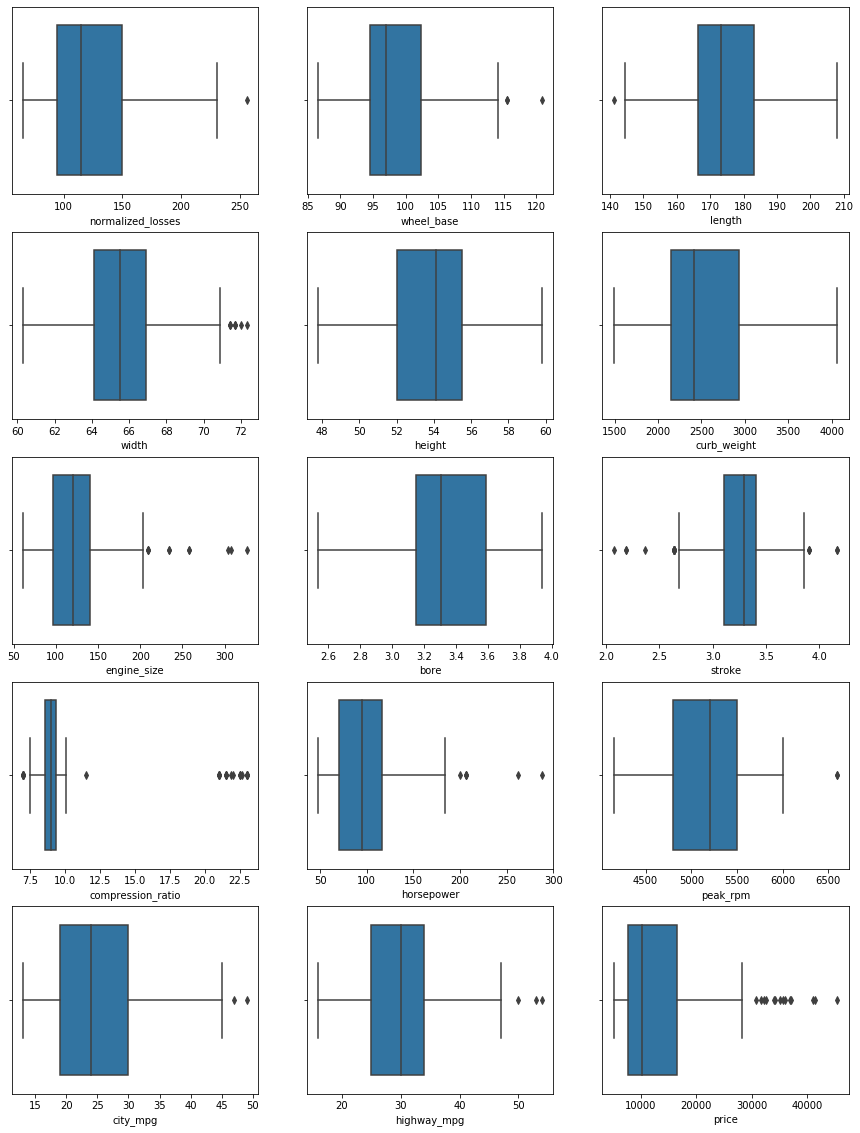

In [55]:
#define a figure to which we will add a boxplot for each of our attributes
plt.figure(figsize=(15,20))

#ignore warnings
np.warnings.filterwarnings('ignore')

#use an index to identify the spot of the subplot
j=1

for k in col_num :   #for each numeric variable graph a boxplot 
    plt.subplot(5,3,j) 
    sns.boxplot(x=k, data=autos);
    j=j+1

#show results    
plt.show()

Based on the above boxplots, there appear to be outliers for many of the variables, which we will need to decide what to do with. We will look at the outliers again after imputing our missing values to see if our situation has changed. 

Next we will begin filling in the missing values.

In [15]:
#first get the rows for the autos that are missing values in the number of doors column
autos[autos.num_of_doors.isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


We notice that both rows that are missing values for number of doors are sedans, so next we will investigate this further.

In [16]:
#see how many doors other sedans have
autos[autos.body_style=='sedan'].num_of_doors.value_counts()

four    79
two     15
Name: num_of_doors, dtype: int64

In [17]:
#now see how many doors most mazda sedans have
autos[(autos.body_style=='sedan') & (autos.make =='mazda')].num_of_doors.value_counts()

four    6
Name: num_of_doors, dtype: int64

In [18]:
#now see how many doors other dodge sedans have
autos[(autos.body_style=='sedan') & (autos.make =='dodge')].num_of_doors.value_counts()

four    2
Name: num_of_doors, dtype: int64

Since all other mazda and dodge sedans have four doors, we will input the missing value as 'four' for each of these two rows. 

In [19]:
#create new df that includes imputed values
autos_impute=autos.copy()
#replace missing values for 'num_of_doors' with the value 'four'
autos_impute['num_of_doors']=autos_impute['num_of_doors'].replace(to_replace = np.NaN , value = 'four')
#check for missing values again
autos_impute.num_of_doors.isnull().sum()

0

Next we will look at the rows with missing values for other attributes to see if we can use similar methods to impute.

In [20]:
#see the rows with missing bore values
autos[autos.bore.isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


In [21]:
#check the bore values for other mazdas
autos[autos.make=='mazda'].bore.value_counts()

3.39    6
3.03    4
3.08    1
3.76    1
3.43    1
Name: bore, dtype: int64

In [22]:
#check the stroke values for other mazdas since these are the four rows also missing values in the stroke column
autos[autos.make=='mazda'].stroke.value_counts()

3.39    6
3.15    5
3.16    1
3.64    1
Name: stroke, dtype: int64

There is not a definitive best choice for the missing bore or stroke values, so we will opt to fill in these missing values using the KNN method. 

In [23]:
#see the rows with missing horsepower values
autos[autos.horsepower.isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


In [24]:
#check the horsepower values for other renaults
autos[autos.make=='renault'].horsepower.value_counts()

Series([], Name: horsepower, dtype: int64)

In [25]:
#check the peak_rpm values for other renaults since these two rows are also missing values in the peak_rpm column
autos[autos.make == 'renault'].peak_rpm.value_counts()

Series([], Name: peak_rpm, dtype: int64)

There are no definitive best choice for the missing horsepower or peak_rpm values so we will impute these values using KNN.

In [26]:
#see the rows with missing pricevalues
autos[autos.price.isnull()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


Unlike horsepower, bore, stroke, and number of doors, there is not a clear pattern for why these data are missing. 

For the missing values that we have not yet filled in, since they are numeric we will use the KNN method. We will use a k value of 14 since that is the nearest integer to the square root of the sample size of 205.

The first step is to eliminate the target and the other categorical variables from the dataset, then impute the missing data and rejoin the dataset.

In [27]:
#create a new dataframe and drop the target variable
knn_input=autos_impute[col_num].copy()
knn_input=knn_input.drop(columns=['city_mpg'])

#check results
knn_input.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,27,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,27,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,26,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,30,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,22,17450.0


In [28]:
#import module
from sklearn.impute import KNNImputer
#impute the values using K value of 14
imputer = KNNImputer(n_neighbors=14, weights="uniform")

#take the array results and transform into a dataframe
auto_input_knn=pd.DataFrame(imputer.fit_transform(knn_input),columns=knn_input.columns.tolist())

#show results
auto_input_knn.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,highway_mpg,price
0,127.928571,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,27.0,13495.0
1,148.928571,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,27.0,16500.0
2,148.928571,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,26.0,16500.0
3,164.000000,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,30.0,13950.0
4,164.000000,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,22.0,17450.0


Now that we have imputed the missing numeric values, we will round the columns where missing data was imputed for consistency.

In [29]:
#since some of the continuous variables present as integers, we will round our imputed values for consistency
auto_input_knn[['normalized_losses', 'horsepower', 'peak_rpm', 'price']]=round(auto_input_knn[['normalized_losses', 'horsepower', 'peak_rpm', 'price']])
#check results
auto_input_knn.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,highway_mpg,price
0,128.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,27.0,13495.0
1,149.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,27.0,16500.0
2,149.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,22.0,17450.0


Now we will rejoin our dataset so that we can later prepare it for use in a model.

In [57]:
#create a dataset that is ready to be used for a model
target=autos_impute['city_mpg'].reset_index(drop=True).copy()
explanatory_numerical=auto_input_knn.reset_index(drop=True).copy()
categorical=autos_impute.drop(columns=col_num, axis=1).reset_index(drop=True).copy()
auto_output_df=pd.concat([target,explanatory_numerical,categorical],axis=1)

#check results
auto_output_df.head()

,city_mpg,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,highway_mpg,price,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
0,21,128.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,27.0,13495.0,3,alfa-romeo,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,21,149.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,27.0,16500.0,3,alfa-romeo,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,19,149.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,26.0,16500.0,1,alfa-romeo,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,24,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,30.0,13950.0,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,18,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,22.0,17450.0,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


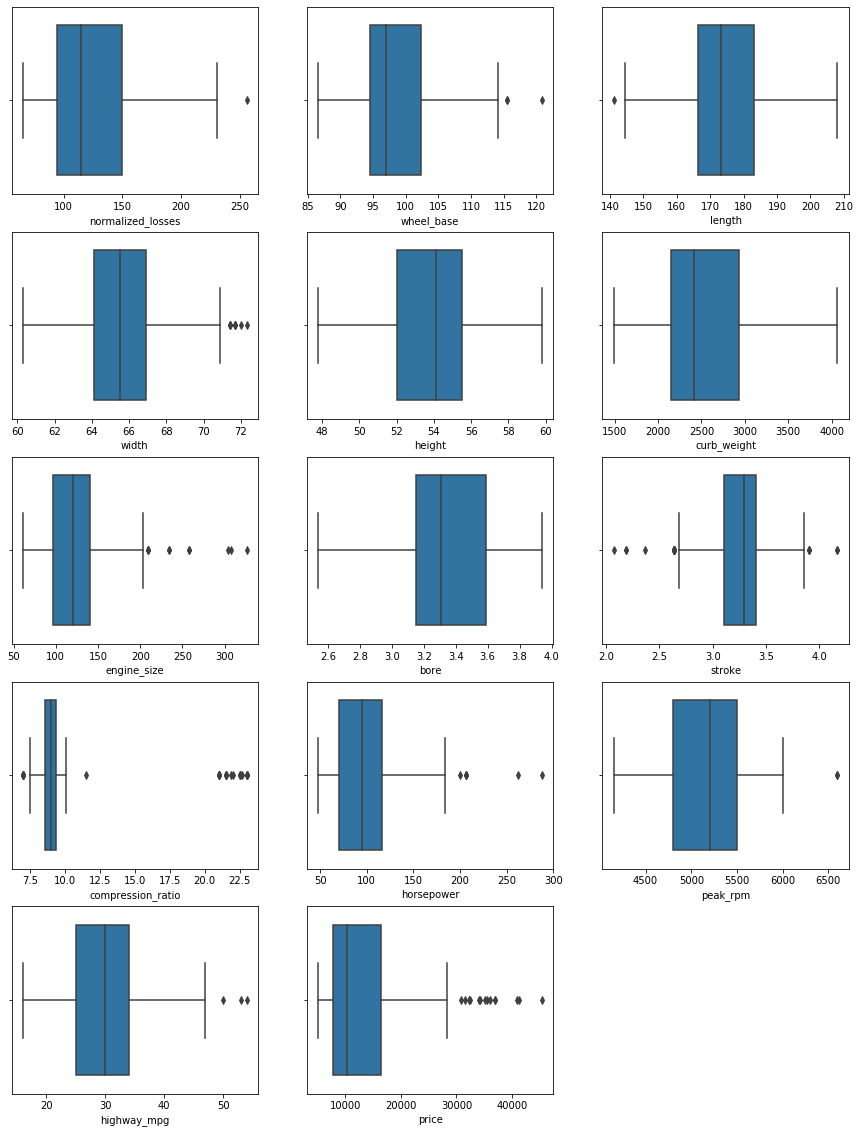

In [58]:
#define a figure to which we will add a boxplot for each of our attributes
plt.figure(figsize=(15,20))

#use an index to identify the spot of the subplot
j=1

for k in explanatory_numerical.columns.to_list() :   #for each numeric variable graph a boxplot 
    plt.subplot(5,3,j) 
    sns.boxplot(x=k, data=autos);
    j=j+1

#show results    
plt.show()

After doing our KNN imputation, there are still some outliers. Now we will explore how many outliers there are in each column so that we can determine what to do with them.

In [59]:
#create a list of the columns to pass through our for loop to count outliers
columns4=explanatory_numerical.columns.tolist()

new_df_pos=explanatory_numerical.copy() #create a copy of our data frame
print('Current shape',explanatory_numerical.shape) #show shape of dataframe before

#use a for loop to iterate through the columns and count outliers
for k in columns4 :
    IQ3=new_df_pos[k].quantile(0.75)
    IQ1=new_df_pos[k].quantile(0.25)
    IQR=(IQ3-IQ1)*1.5
    print('number of outliers for the variable %s:' %k, new_df_pos.shape[0]-new_df_pos[((new_df_pos[k]>=(IQ1-IQR)) & (new_df_pos[k]<=(IQ3+IQR))) | (new_df_pos[k].isnull())].shape[0])

Current shape (205, 14)
number of outliers for the variable normalized_losses: 2
number of outliers for the variable wheel_base: 3
number of outliers for the variable length: 1
number of outliers for the variable width: 8
number of outliers for the variable height: 0
number of outliers for the variable curb_weight: 0
number of outliers for the variable engine_size: 10
number of outliers for the variable bore: 0
number of outliers for the variable stroke: 20
number of outliers for the variable compression_ratio: 28
number of outliers for the variable horsepower: 6
number of outliers for the variable peak_rpm: 2
number of outliers for the variable highway_mpg: 3
number of outliers for the variable price: 14


We will now look at the rows which contain outliers in the compression ratio column (which has the most outliers).

In [33]:
autos[autos['compression_ratio']>20]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
66,0,NaN,mazda,diesel,std,four,sedan,rwd,front,104.9,175.0,66.1,54.4,2700,ohc,four,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0
67,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,190.9,70.3,56.5,3515,ohc,five,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,25552.0
68,-1,93.0,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,190.9,70.3,58.7,3750,ohc,five,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28248.0
69,0,93.0,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,54.9,3495,ohc,five,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28176.0
70,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,56.3,3770,ohc,five,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600.0
90,1,128.0,nissan,diesel,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,2017,ohc,four,103,idi,2.99,3.47,21.9,55.0,4800.0,45,50,7099.0
108,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3197,l,four,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33,13200.0
110,0,NaN,peugot,diesel,turbo,four,wagon,rwd,front,114.2,198.9,68.4,58.7,3430,l,four,152,idi,3.70,3.52,21.0,95.0,4150.0,25,25,13860.0
112,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3252,l,four,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33,16900.0


Although there are a few outliers, the variable with the most outliers is compression ratio. After doing some research we see that it is possible for the compression ratio to go up to 23, and this is more common in diesel cars so we have opted to not exclude these outliers as they appear to be valid data. [Source](https://en.wikipedia.org/wiki/Compression_ratio)

Next we will look at a correlation map before we start our Principal Component Analysis (PCA) to try and identify if there are any collinear variables.

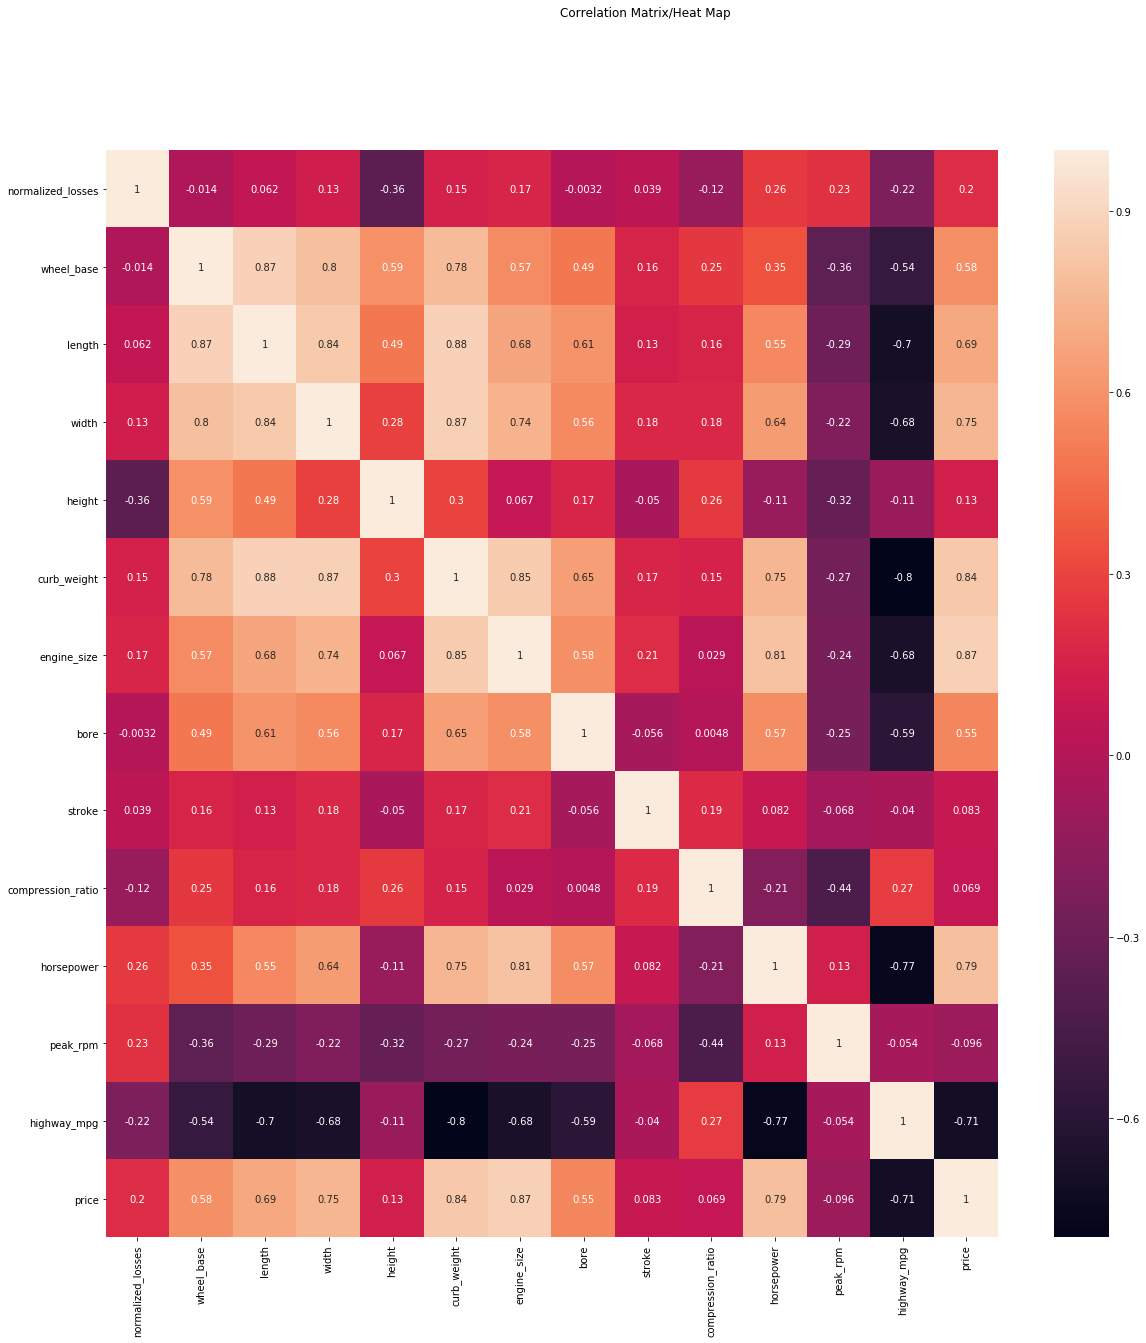

In [60]:
#graph heat map for correlation
corr_num=explanatory_numerical.corr()
fig = plt.figure(figsize=(20, 20))
sns.heatmap(corr_num, annot=True);
fig.suptitle('Correlation Matrix/Heat Map') 

# fix for mpl bug that cuts off top/bottom of seaborn viz taken from link above
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

There are a few variables which have a high correlation which may indicate collinearity, such as highway_mpg and curb weight. 

This indicates that it might be appropriate to perform PCA for dimensionality reduction of the numeric attributes.

We will now look at a boxplot of each of the categorical variables against the target variable to identify independence.

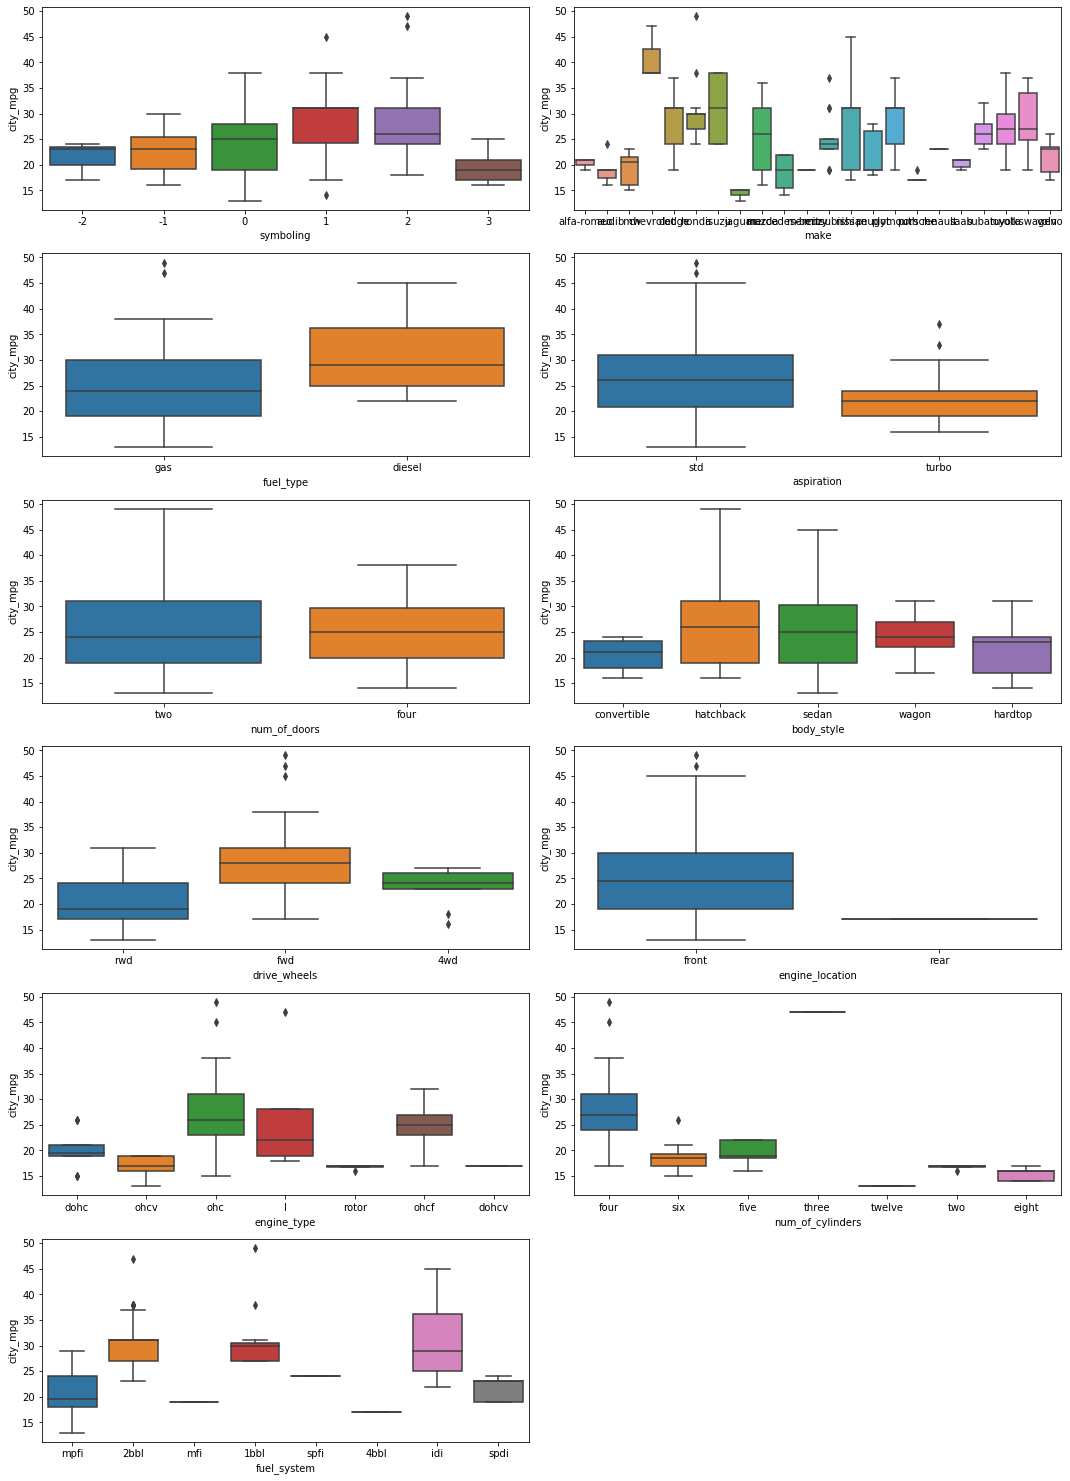

In [68]:
plt.rcParams.update({'font.size': 10,'figure.figsize':(15,75)}) # set plot parameters
#use an index to identify the spot of the subplot
j=1
for k in categorical.columns.to_list():   #for each categorical attribute 
    plt.subplot(22,2,j) 
    sns.boxplot(data=autos, x=k, y='city_mpg')
    j=j+1

plt.tight_layout()
#show results    
plt.show()


From the boxplots above we are expecting that the attributes fuel system, engine type, number of cylinders, engine location, symboling, and make will be better predictors. Next we will perform a chi-square test of independence to further check our findings.

In [36]:
#import stats module to perform chi-square
from scipy import stats

#perform chi-square test
chi_sq=[]
for i in range(0,11):
    chi_sq.append([stats.chi2_contingency(pd.crosstab(target, categorical.iloc[:,i]))[0:2],i])
#chi_sq
chi_sq.sort(reverse=True)
chi_sq

[[(1121.8001978839227, 9.337523302306081e-36), 1],
 [(748.3924905094323, 3.700629569435641e-74), 9],
 [(390.71894047902134, 4.7654986858963054e-15), 10],
 [(298.3342946075318, 2.4080280207970434e-09), 8],
 [(224.133277862081, 8.159031529123627e-06), 0],
 [(113.0049277801471, 1.0010273114585954e-05), 6],
 [(110.41670688545688, 9.743709779377768e-12), 2],
 [(108.78042138362079, 0.5684949467956826), 5],
 [(52.75775012010131, 0.0031336389732258573), 3],
 [(44.965727341964964, 0.02223930137379753), 7],
 [(33.79850469568602, 0.20758615575917208), 4]]

Our chi square test tells us the following columns should be the most significant columns to include in our analysis. 
column 1= make
column 9= engine_type
column 10= num_of_cylinders
column 8= engine_location
column 0= symboling

Next we will create dummy variables for our categorical variables so that they can be included in our linear regression model later on.

In [37]:
#get dummies
categorical_dummy=pd.get_dummies(categorical.iloc[:,[1,9,10,8,0]],drop_first=True)
#check results
categorical_dummy.head()

,symboling,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,num_of_cylinders_five,num_of_cylinders_four,num_of_cylinders_six,num_of_cylinders_three,num_of_cylinders_twelve,num_of_cylinders_two,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi,engine_type_dohcv,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_rotor
0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


## Dimensionality Reduction & Feature Selection 

### Principal Component Analysis (PCA)

First we will split our data into training and testing sets. Then we will standardize the training set. Then we will split the numeric variables into a separate set so that we can perform PCA on the numeric variables. 

In [38]:
#creating a dataframe with all numeric variables and the dummy categorical variables
explanatory=pd.concat([explanatory_numerical,categorical_dummy],axis=1)

#Import the module of the package sklearn.model_selection to split the dataframe into training and test
from sklearn.model_selection import train_test_split

#create the train and test datasets for the target and expanatory variables. Test size 0.3
X1_train, X1_test, y1_train, y1_test = train_test_split(explanatory, target, test_size=0.3, random_state=12)

Next we will turn the target variable into a data Frame and then standardize both training sets.

In [39]:
#transform the target variable into a Data Frame
y1_train=pd.DataFrame(y1_train).reset_index(drop=True)
y1_test=pd.DataFrame(y1_test).reset_index(drop=True)

In [40]:
#create separate data frames for the numeric testing and training data to be used in PCA
X1_train=X1_train.copy().reset_index(drop=True)
X1_train_num=X1_train[explanatory_numerical.columns.tolist()].copy().reset_index(drop=True)
X1_test_num=X1_test[explanatory_numerical.columns.tolist()].copy().reset_index(drop=True)
# X1_train_cat=X1_train[explanatory_numerical.columns.tolist()].copy()
# X1_test_cat=X1_test[categorical.columns.tolist()].copy()

In [41]:
#standardize variables
from sklearn.preprocessing import StandardScaler
X1_train_std = pd.DataFrame(StandardScaler().fit_transform(X1_train_num))
y1_train_std = pd.DataFrame(StandardScaler().fit_transform(y1_train)).reset_index(drop=True)
y1_train_std=y1_train_std.rename(columns={0:'city_mpg'})

In [42]:
#standardize test using the mean and std of the train data frame
X1_test_std=X1_test_num.copy()
for i in X1_test_num.columns.tolist():
    train_mean=X1_train_num[i].mean()
    train_std=X1_train_num[i].std()
    X1_test_std[i] = ((X1_test_num[i])- train_mean)/train_std

#standardize the target
y1_test_std=y1_test.copy()
y1_test_std = ((y1_test)-y1_train.mean())/y1_train.std()

In [43]:
# load PCA + SVM classifier ("SVC") + cross validation functions
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import model_selection

# apply the PCA function to the training data
#pca.fit(X1_train_std)

variance_ratio=[]
for k in range(1,14):
    pca = PCA(n_components=k)
    pca.fit(X1_train_std)
    variance_ratio.append(round((pca.explained_variance_ratio_)[k-1],4))

In [44]:
#display variance ratio from PCA 
variance_ratio

[0.4973,
 0.1691,
 0.0858,
 0.063,
 0.0511,
 0.0393,
 0.0304,
 0.0196,
 0.0155,
 0.0091,
 0.0066,
 0.005,
 0.0046]

Next we will visualize our results to determine how many components should be used in our model.

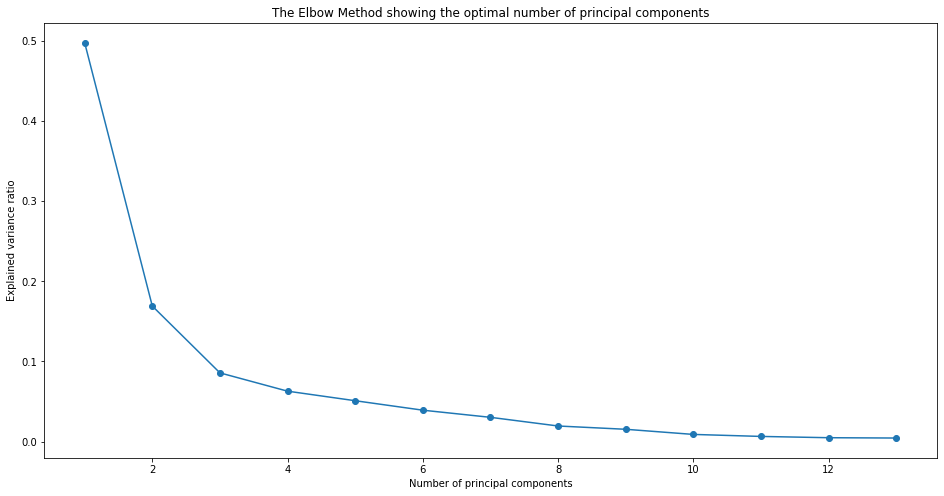

In [71]:
#graph elblow chart of components and explained variance
K=range(1,14)
plt.figure(figsize=(16,8))
plt.plot(K, variance_ratio, 'o-')
plt.xlabel('Number of principal components')
plt.ylabel('Explained variance ratio')
plt.title('The Elbow Method showing the optimal number of principal components')
plt.show()


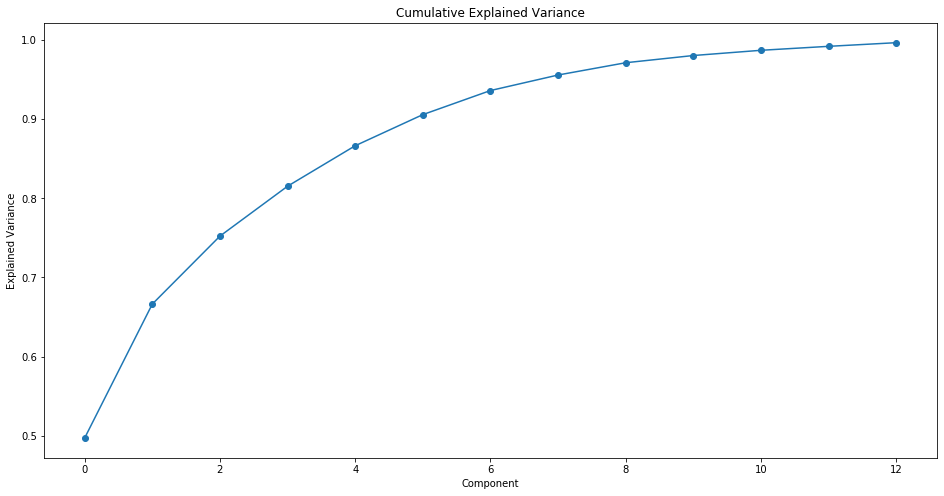

In [74]:
#graph cumulative explained variance
fig,ax = plt.subplots(figsize=(16,8))

ax.plot(np.cumsum(variance_ratio),'o-');
ax.set(xlabel="Component", ylabel="Explained Variance", title = "Cumulative Explained Variance");


From the above analysis and charts, we believe we should use 5 principal components as that explains ~ 90% of the variance in our data. We will now look at the composition of the components.

In [47]:
#look at composition of components
fin_pca= PCA(n_components=5)
fin_pca.fit(X1_train_std)
loadings = fin_pca.components_.T * np.sqrt(fin_pca.explained_variance_)
loadings=pd.DataFrame(loadings, columns=['PC1','PC2','PC3','PC4','PC5'], index=X1_train_num.columns.tolist())
loadings

#inspiration https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html

,PC1,PC2,PC3,PC4,PC5
normalized_losses,0.133593,-0.574929,-0.391663,-0.299551,0.601961
wheel_base,0.825042,0.381010,0.088286,0.126759,0.254437
length,0.919990,0.183152,0.123477,0.052130,0.158344
width,0.935685,0.061336,-0.069031,-0.008584,0.076116
height,0.336226,0.676508,0.425109,0.255112,0.275302
curb_weight,0.973430,0.004112,-0.053261,-0.005372,0.021047
engine_size,0.884240,-0.180679,-0.163258,-0.062473,-0.209519
bore,0.724325,-0.009773,0.225608,-0.171787,-0.219811
stroke,0.147757,0.184327,-0.701379,0.621152,-0.099323
compression_ratio,0.155107,0.696648,-0.450944,-0.246089,0.055244


As we saw before, curb weight and highway mpg are most represented by the same principal component, as we expected.
Now we will transform the original explanatory variables to principal components. 

In [48]:
#transform the test and train data according to our PCA
X_t_train = pd.DataFrame(fin_pca.transform(X1_train_std), columns=['PC1','PC2','PC3','PC4','PC5']).reset_index(drop=True)
X_t_test = pd.DataFrame(fin_pca.transform(X1_test_std), columns=['PC1','PC2','PC3','PC4','PC5']).reset_index(drop=True)

Now we have to rejoin the categorical dummy variables to our newly transformed data.

In [75]:
#join the numerical and categorical dummy dataframes with the PCA

X1_train_final=pd.concat([X1_train,X_t_train],axis=1).reset_index(drop=True)
X1_train_final=X1_train_final.drop(columns=explanatory_numerical.columns.tolist())
X1_test_final=pd.concat([X1_test.reset_index(drop=True),X_t_test],axis=1).reset_index(drop=True)
X1_test_final=X1_test_final.drop(columns=explanatory_numerical.columns.tolist())

## Regression & Analysis

Since we have now reduced dimensionality and selected our features, we will create our regression models and test for accuracy.

In [76]:
# import statsmodels 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# combine X_train & y_train to create a train_data dataframe 
# that we'll feed into the model construction formula
train_data = pd.concat([X1_train_final, y1_train_std], axis=1)

# check result is as expected
print("The number of observations in the train_data dataframe: {}".format(train_data.shape[0]))
print("The first few rows of the train_data dataframe:")
train_data.head()


The number of observations in the train_data dataframe: 143
The first few rows of the train_data dataframe:


,symboling,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,num_of_cylinders_five,num_of_cylinders_four,num_of_cylinders_six,num_of_cylinders_three,num_of_cylinders_twelve,num_of_cylinders_two,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi,engine_type_dohcv,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,PC1,PC2,PC3,PC4,PC5,city_mpg
0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,2.857716,0.389531,1.431125,0.593646,-0.042059,-0.919114
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.506899,-0.493608,1.502308,0.577499,-0.140065,-0.919114
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,-3.467710,-0.317665,-0.309491,-0.397624,0.320406,1.921879
3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,-1.504111,3.389695,-1.482379,-0.623301,-0.044468,1.772353
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-3.366334,-0.718207,-0.212568,1.525074,-0.160863,0.725672


In [51]:
# create a model with the variables chosen for model_1
X1_train_model=sm.add_constant(X1_train_final)
est = sm.OLS(y1_train_std, X1_train_model)
est_fit = est.fit()

#print the results
print(est_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               city_mpg   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     41.00
Date:                Sun, 14 Jun 2020   Prob (F-statistic):           5.04e-47
Time:                        22:12:36   Log-Likelihood:                 4.6178
No. Observations:                 143   AIC:                             76.76
Df Residuals:                     100   BIC:                             204.2
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

We note that our model has an R^2 value of 0.945, which indicates that it explains 94.5% of the variance in our data. We note that there are many variables with a high p-value which is undesirable, so we will use backward selection later on to improve our model. 

First we will cross-validate this model using k-fold cross validation with 10 folds. Since we have a small data set this will be appropriate.

In [77]:
#next we will load the functions we need from the sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#Assign the linear regression model to a variable
model = LinearRegression()

#use k-fold cross validation with 10 folds since we have a small dataset this will be appropriate
results = cross_val_score(model, X1_train_final, y1_train_std, cv=10)

#print results
print (results)
#calculate the average accuracy across all 5 folds and print the results
print("The average accuracy score for the 10 folds was: ", np.mean(results))

[0.65439941 0.90737634 0.6951106  0.85499699 0.96377392 0.83496769
 0.87236232 0.87958202 0.7288237  0.6977628 ]
The average accuracy score for the 10 folds was:  0.8089155796748706


Our cross validated accuracy score was ~81%. Next we will check the residual plots. 

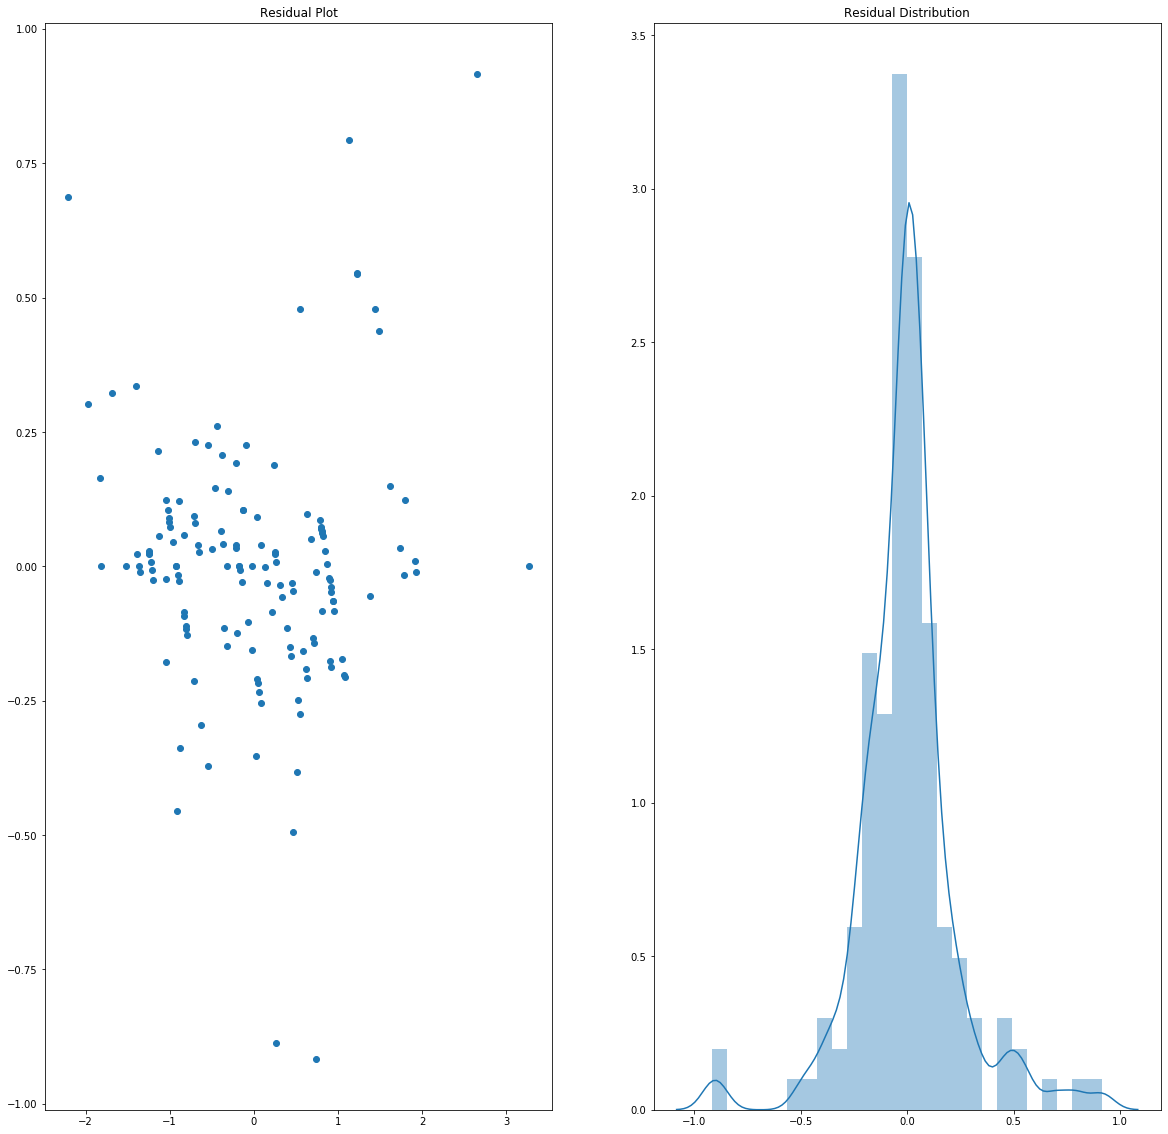

In [79]:
#generate predictions based on training set
ypred=est_fit.predict(X1_train_model)

#calculate the residuals
residuals = y1_train_std.iloc[:,0] - ypred

#plot the residual plot for the first model
fig = plt.figure(figsize=(20,20))#define the figure
plt.subplot(1,2,1) #create the first subplot
residual=plt.scatter(ypred,residuals); #scatterplot of the residuals for the first model
plt.title('Residual Plot')

#create the residual distribution
plt.subplot(1,2,2)
sns.distplot(residuals);
plt.title('Residual Distribution');

In [80]:
#Import the module metrics from sklearn
from sklearn import metrics

model_fit = LinearRegression().fit(X1_train_final, y1_train_std.iloc[:,0])
#calculate the predicted values of the test sample
y1_test_pred = model_fit.predict(X1_test_final)

# calculate the RMSE
print(np.sqrt(metrics.mean_squared_error(y1_test_std, y1_test_pred)))

0.3422571005284483


Our residual plots indicate that a linear model is valid. 

### Feature Selection - Backward elimination

For this section we used code from [Towards Data Science](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b) to improve our model. 

In [82]:
#create a function that will tell us which variables have a p-value less than .05.
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [83]:
#run function and display results
backselect_variables=backward_elimination(X1_train_final, y1_train_std)
backselect_variables

['make_bmw',
 'make_chevrolet',
 'make_isuzu',
 'make_volvo',
 'num_of_cylinders_six',
 'num_of_cylinders_two',
 'fuel_system_2bbl',
 'fuel_system_idi',
 'fuel_system_mpfi',
 'fuel_system_spdi',
 'fuel_system_spfi',
 'engine_type_ohc',
 'engine_type_rotor',
 'PC1',
 'PC2',
 'PC3',
 'PC4']

From above we see which variables we should include, so we will now create a dataframe with just those variables to create another model. 

In [84]:
#create a new data frame with the variables that had a p-value less than 0.05
X1_train_bkw=X1_train_final[backselect_variables]
#display results
X1_train_bkw.head()

,make_bmw,make_chevrolet,make_isuzu,make_volvo,num_of_cylinders_six,num_of_cylinders_two,fuel_system_2bbl,fuel_system_idi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi,engine_type_ohc,engine_type_rotor,PC1,PC2,PC3,PC4
0,0,0,0,1,0,0,0,0,1,0,0,1,0,2.857716,0.389531,1.431125,0.593646
1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.506899,-0.493608,1.502308,0.577499
2,0,0,1,0,0,0,1,0,0,0,0,1,0,-3.467710,-0.317665,-0.309491,-0.397624
3,0,0,0,0,0,0,0,1,0,0,0,1,0,-1.504111,3.389695,-1.482379,-0.623301
4,0,0,0,0,0,0,0,0,0,0,0,1,0,-3.366334,-0.718207,-0.212568,1.525074


In [85]:
# create model 2 with the newly selected data
X1_train_model=sm.add_constant(X1_train_bkw)
est_bwk = sm.OLS(y1_train_std, X1_train_model)
est_fit_bwk = est_bwk.fit()

#print the results
print(est_fit_bwk.summary())

                            OLS Regression Results                            
Dep. Variable:               city_mpg   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     88.74
Date:                Sun, 14 Jun 2020   Prob (F-statistic):           1.70e-60
Time:                        23:47:10   Log-Likelihood:                -23.657
No. Observations:                 143   AIC:                             81.31
Df Residuals:                     126   BIC:                             131.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5764 

We note that our new model has an R^2 value of ~91.8%. This indicates that approximately 92% of the variance in our data is explained by our model. While our first model had a higher R^2 value, it was also more computationally expensive.

Next we will cross-validate this model using k-fold cross validation with 10 folds. Since our dataset is small, this is an appropriate number of folds. 

In [86]:
#next we will load the functions we need from the sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#Assign the linear regression model to a variable
model = LinearRegression()

#use k-fold cross validation with 10 folds
results = cross_val_score(model, X1_train_bkw, y1_train_std, cv=10)

#print results
print (results)
#calculate the average accuracy across all 10 folds and print the results
print("The average accuracy score for the 10 folds was: ", np.mean(results))

[0.87110675 0.91478718 0.80974438 0.83668034 0.84774737 0.84268384
 0.85928462 0.85312088 0.81504383 0.88271812]
The average accuracy score for the 10 folds was:  0.8532917308152689


Our cross-validated accuracy for this model is 85%.  Next we will look at the residuals. 

ypred_bkw=est_fit_bwk.predict(X1_train_model)

#calculate the residuals
residuals_bkw = y1_train_std.iloc[:,0] - ypred_bkw


#plot the residual plot for the first model
fig = plt.figure(figsize=(20,20))#define the figure
plt.subplot(1,2,1) #create the first subplot
residual=plt.scatter(ypred_bkw,residuals_bkw); #scatterplot of the residuals for the first model
plt.title('Residual Plot')

#create the residual distribution
plt.subplot(1,2,2)
sns.distplot(residuals_bkw);
plt.title('Residual Distribution');

In [88]:
#Import the module metrics from sklearn
from sklearn import metrics

model_bkw = LinearRegression().fit(X1_train_bkw, y1_train_std.iloc[:,0])
#calculate the predicted values of the test sample
X1_test_bkw=X1_test_final[backselect_variables]
y1_test_pred = model_bkw.predict(X1_test_bkw)

# calculate the RMSE
print(np.sqrt(metrics.mean_squared_error(y1_test_std, y1_test_pred)))

0.35481473836810573


Our residual plots indicate that a linear model is valid for this data.

###  Model 3 - Bidirectional Selection

For our third model we will use bidirectional selection. We referenced the Towards Data Science article mentioned above for this section also. 

In [89]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [90]:
biselect_variables=stepwise_selection(X1_train_final, y1_train_std)
biselect_variables

['PC1',
 'PC2',
 'PC3',
 'make_chevrolet',
 'PC4',
 'num_of_cylinders_two',
 'engine_type_rotor',
 'fuel_system_spdi',
 'make_honda',
 'make_volvo',
 'fuel_system_2bbl']

In [91]:
X1_train_bis=X1_train_final[biselect_variables]
X1_train_bis.head()

,PC1,PC2,PC3,make_chevrolet,PC4,num_of_cylinders_two,engine_type_rotor,fuel_system_spdi,make_honda,make_volvo,fuel_system_2bbl
0,2.857716,0.389531,1.431125,0,0.593646,0,0,0,0,1,0
1,1.506899,-0.493608,1.502308,0,0.577499,0,0,0,0,0,0
2,-3.467710,-0.317665,-0.309491,0,-0.397624,0,0,0,0,0,1
3,-1.504111,3.389695,-1.482379,0,-0.623301,0,0,0,0,0,0
4,-3.366334,-0.718207,-0.212568,0,1.525074,0,0,0,1,0,0


In [92]:
# create a model with the variables chosen for model 3
X1_train_model=sm.add_constant(X1_train_bis)
est_bis = sm.OLS(y1_train_std, X1_train_model)
est_fit_bis = est_bis.fit()

#print the results
print(est_fit_bis.summary())


                            OLS Regression Results                            
Dep. Variable:               city_mpg   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     129.0
Date:                Sun, 14 Jun 2020   Prob (F-statistic):           4.50e-63
Time:                        23:52:34   Log-Likelihood:                -32.928
No. Observations:                 143   AIC:                             87.86
Df Residuals:                     132   BIC:                             120.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1022 

We can see that the R^2 value is lower than the previous two models, as we expected since there are fewer variables. 

In [93]:
#next we will load the functions we need from the sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#Assign the linear regression model to a variable
model = LinearRegression()

#use k-fold cross validation with HOW MANY FOLDS AND EXPLAIN WHY
results = cross_val_score(model, X1_train_bis, y1_train_std, cv=5)

#print results
print (results)
#calculate the average accuracy across all 5 folds and print the results
print("The average accuracy score for the 5 folds was: ", np.mean(results))

[0.77146443 0.86798785 0.89363413 0.87352246 0.87941293]
The average accuracy score for the 5 folds was:  0.8572043590437666


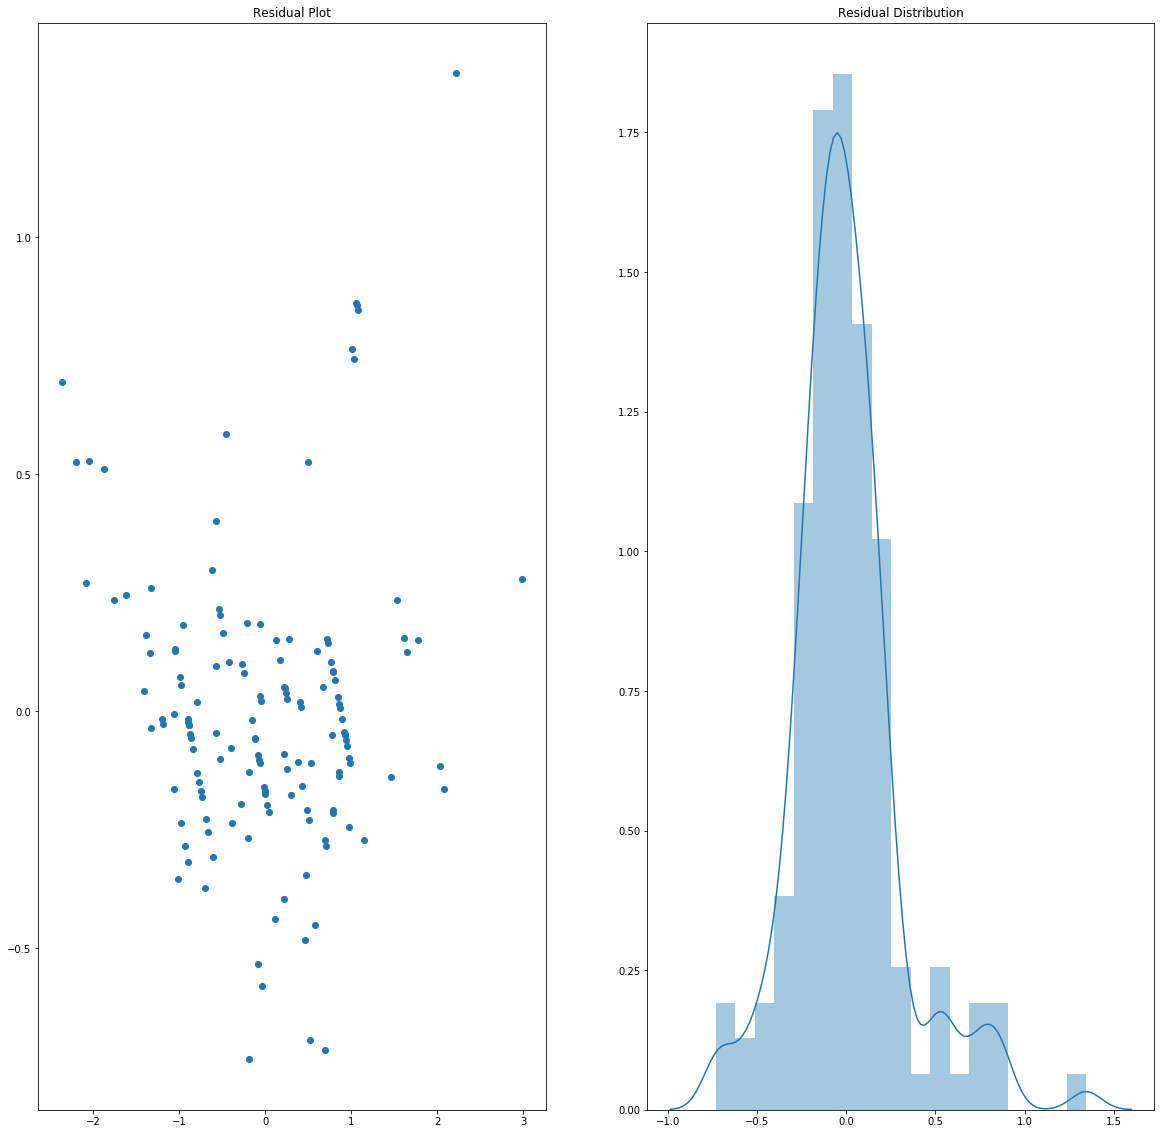

In [94]:
ypred_bis=est_fit_bis.predict(X1_train_model)
#calculate the residuals
residuals_bis = y1_train_std.iloc[:,0] - ypred_bis

#plot the residual plot for the first model
fig = plt.figure(figsize=(20,20))#define the figure
plt.subplot(1,2,1) #create the first subplot
residual=plt.scatter(ypred_bis,residuals_bis); #scatterplot of the residuals for the first model
plt.title('Residual Plot')

#create the residual distribution
plt.subplot(1,2,2)
sns.distplot(residuals_bis);
plt.title('Residual Distribution');

In [95]:
model_bis = LinearRegression().fit(X1_train_bis, y1_train_std.iloc[:,0])

#calculate the predicted values of the test sample
X1_test_bis=X1_test_final[biselect_variables]

y1_test_pred = model_bis.predict(X1_test_bis)

# calculate the RMSE
print(np.sqrt(metrics.mean_squared_error(y1_test_std, y1_test_pred)))

0.3279769971446347


Our residual plot indicates that a linear model is valid. 

## Results & Conclusions



We can see from the models that the best choice is the one made with the bidirectional method.  
Comparing it with the backward selection we can see that the R-squared is lower but only from  0.918 to  0.907. This is expected considering that we have less variables (7 minus than the backward selection). 
The average accuracy is higher than the backward selection method. 0.8572 in the bidirectional one vs 0.8505 in the backward one.
The RMSE is lower as expected but considering the advantage of avoiding the expenses in computation due to the decreasing of the variables we consider the bidirectional model the best model to use in this case.
